Saving stock_prices.csv to stock_prices (6).csv
First 5 rows:
                 AAPL       MSFT         SPY       TSLA
Date                                                   
2018-01-02  40.304173  78.870354  237.208176  21.368668
2018-01-03  40.297157  79.237373  238.708572  21.150000
2018-01-04  40.484333  79.934814  239.714737  20.974667
2018-01-05  40.945263  80.925873  241.312210  21.105333
2018-01-08  40.793186  81.008438  241.753464  22.427334


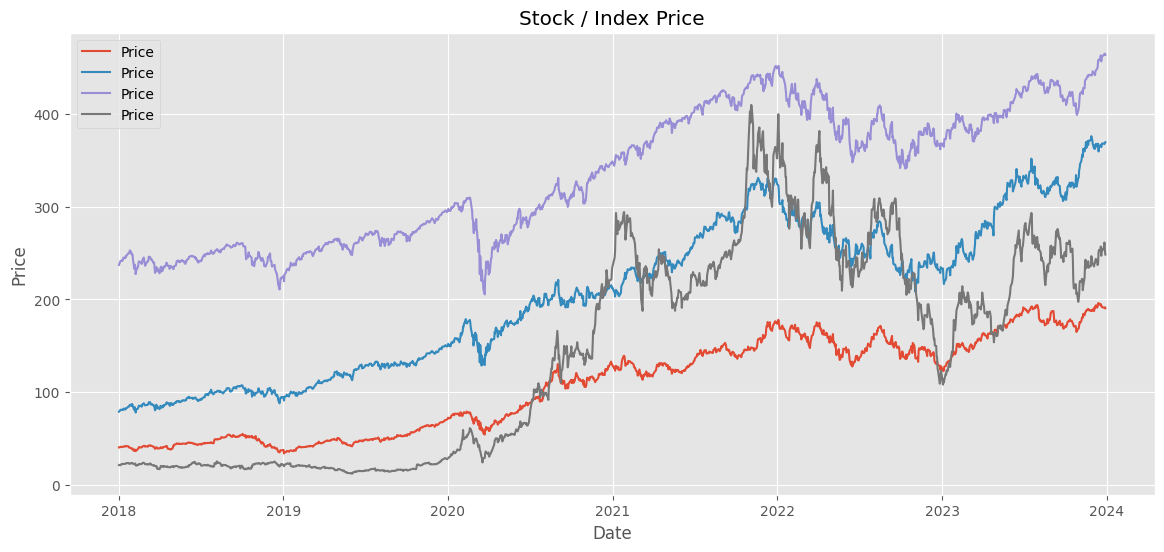


Annualized Volatility:
AAPL    0.316770
MSFT    0.301238
SPY     0.203886
TSLA    0.637668
dtype: float64

Sharpe Ratio:
AAPL    0.978331
MSFT    1.007968
SPY     0.652166
TSLA    0.961379
dtype: float64


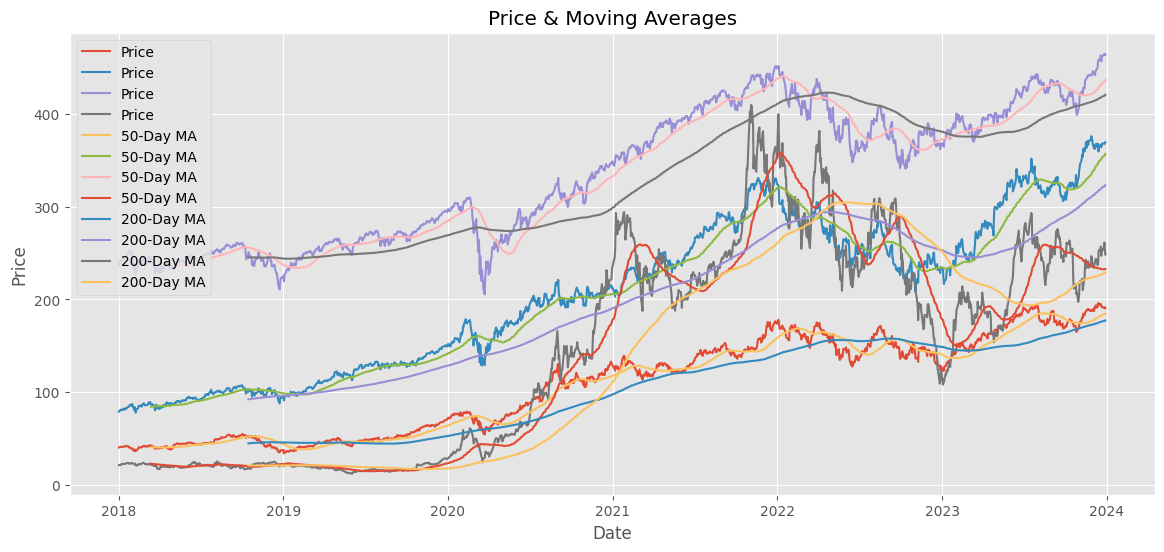

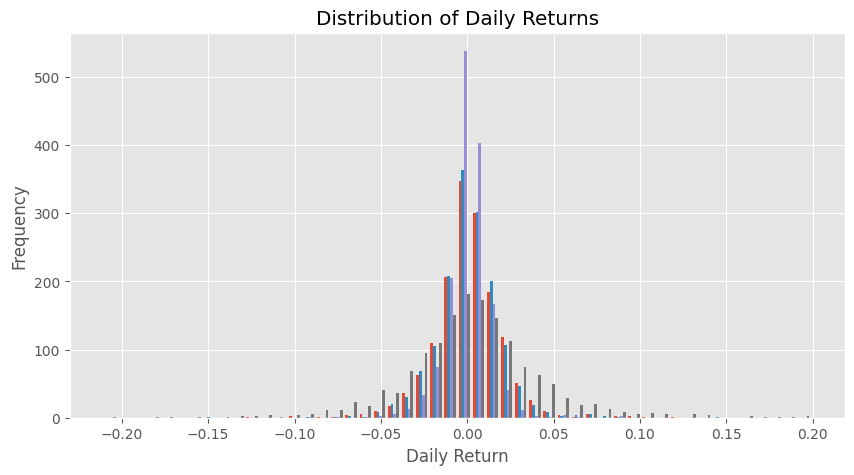

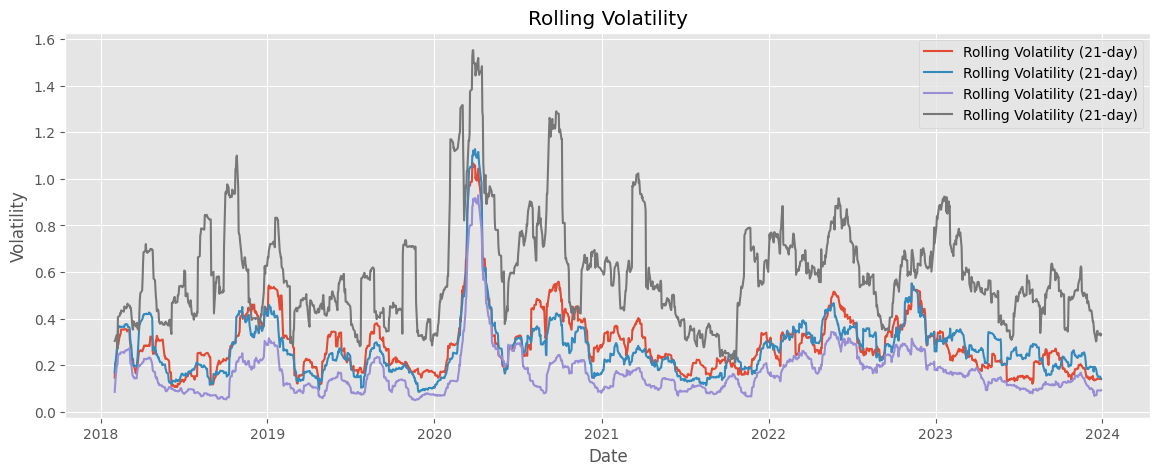

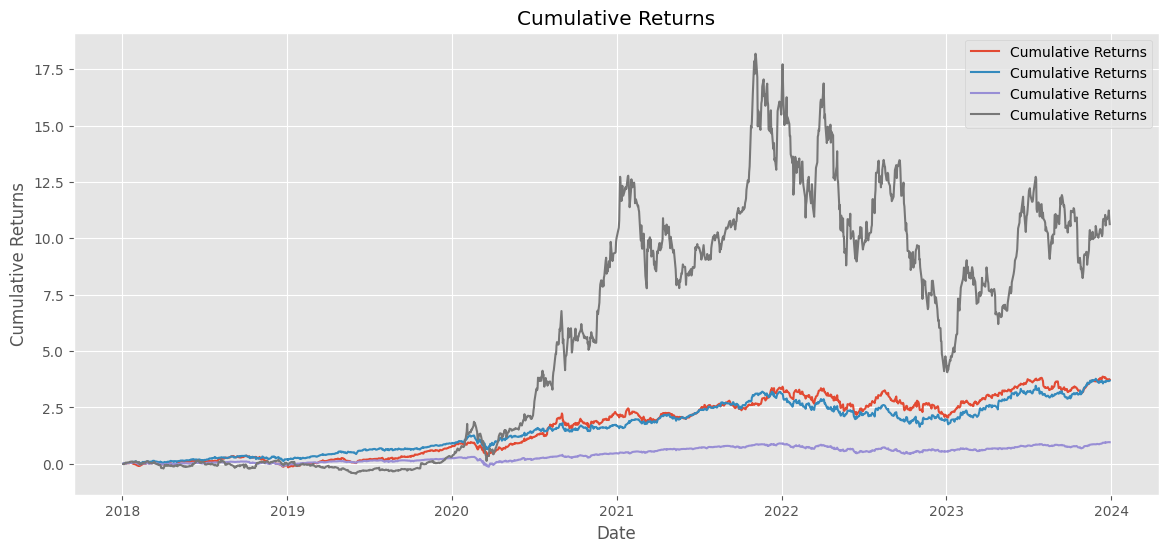

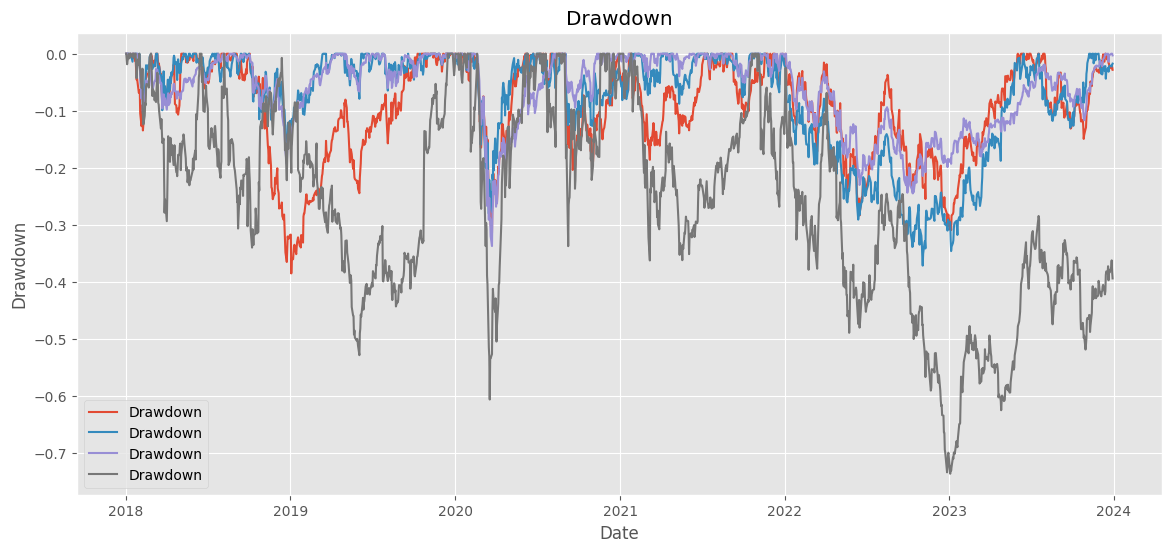

/tmp/ipython-input-2385870417.py:137: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (volatility[i], mean_returns[i]))


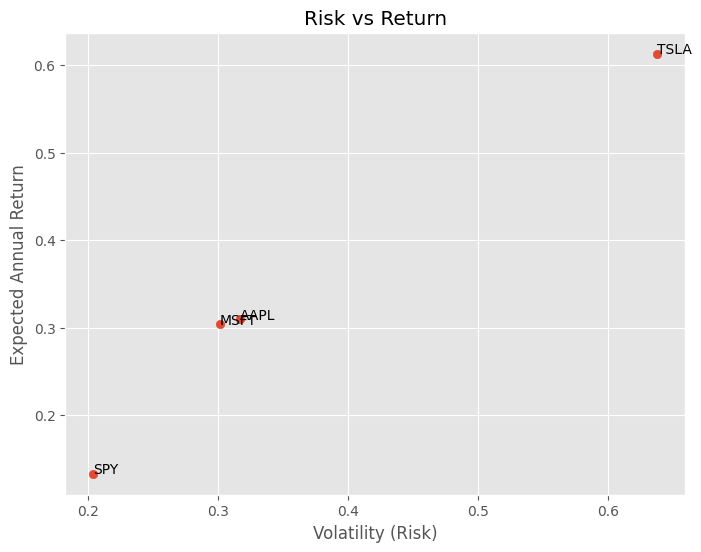

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


 Financial Analysis Complete!
All charts saved and ready for GitHub.


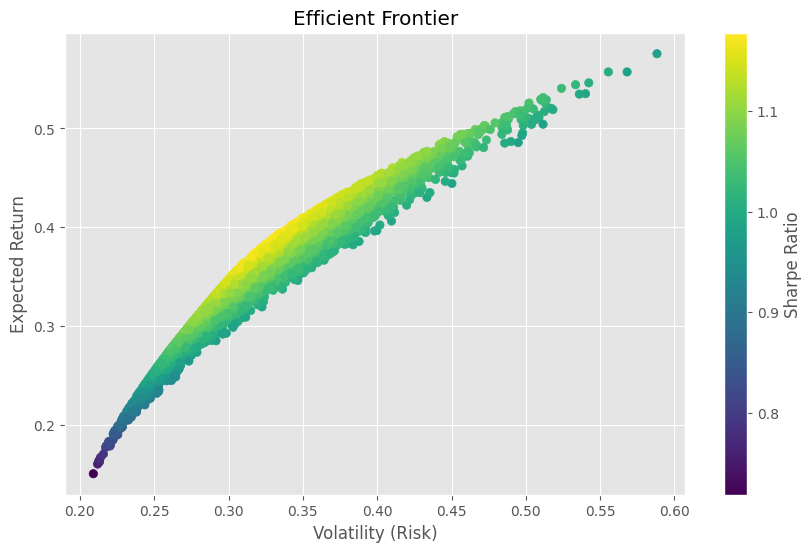


Optimal Portfolio Weights:
AAPL: 32.13%
MSFT: 42.23%
SPY: 0.45%
TSLA: 25.2%

Maximum Sharpe Ratio Portfolio:
Return: 0.3829
Volatility: 0.325
Sharpe Ratio: 1.1781


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

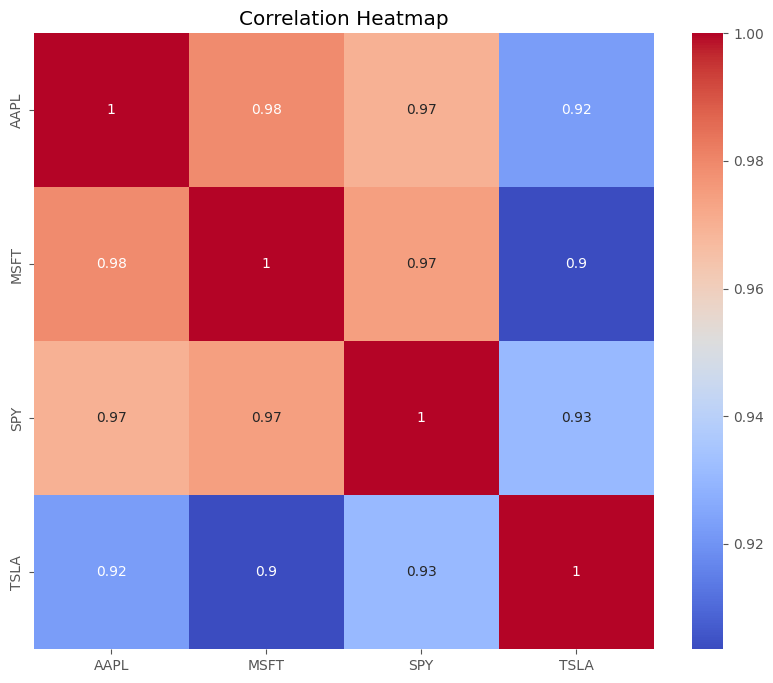

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


Beta values relative to benchmark (first column):
AAPL: 1.0
MSFT: 0.713
SPY: 0.513
TSLA: 0.935

Maximum Drawdown: -38.52% on 2019-01-03 00:00:00


/tmp/ipython-input-2385870417.py:274: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  end_date = drawdown.idxmin()[0] if isinstance(drawdown, pd.DataFrame) else drawdown.idxmin()
/tmp/ipython-input-2385870417.py:278: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nMaximum Drawdown: {round(max_dd[0]*100,2)}% on {end_date}")


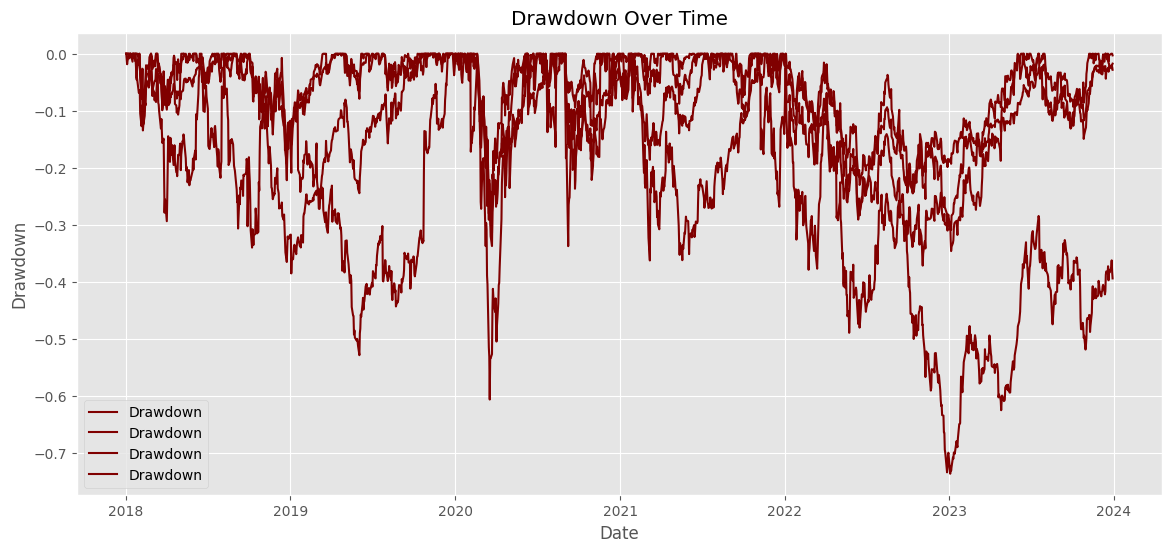

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

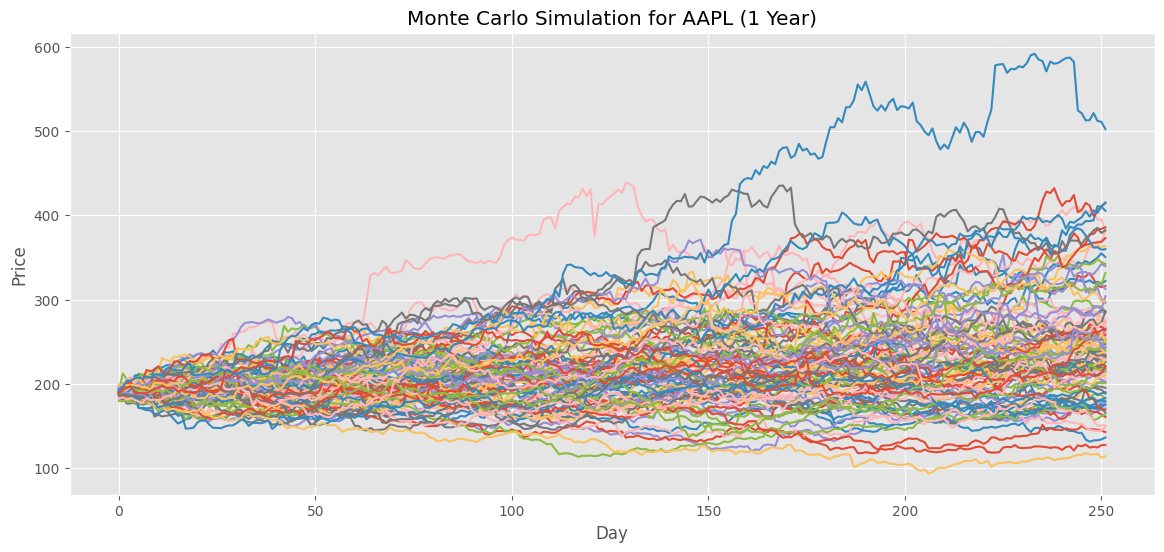

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# -------------------------------
# Financial Analysis Dashboard (Complete Version)
# -------------------------------

# Step 0: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

plt.style.use('ggplot')

# -------------------------------
# Step 1: Upload CSV
# -------------------------------
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Load data
data = pd.read_csv(file_name, index_col='Date', parse_dates=True)

print("First 5 rows:")
print(data.head())

# -------------------------------
# Phase 1: Basic Price Plot
# -------------------------------
plt.figure(figsize=(14,6))
plt.plot(data, label='Price')
plt.title('Stock / Index Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig("price_trend.png")
plt.show()

# -------------------------------
# Phase 2: Financial Metrics
# -------------------------------

# Daily Returns
returns = data.pct_change()

# Annualized Volatility
volatility = returns.std() * (252 ** 0.5)

# Mean Annual Return
mean_returns = returns.mean() * 252

# Moving Averages
ma_50 = data.rolling(50).mean()
ma_200 = data.rolling(200).mean()

# Sharpe Ratio
stock_sharpe_ratio = (returns.mean() / returns.std()) * (252 ** 0.5) # Renamed to stock_sharpe_ratio

print("\nAnnualized Volatility:")
print(volatility)

print("\nSharpe Ratio:")
print(stock_sharpe_ratio) # Updated to stock_sharpe_ratio

# -------------------------------
# Plot 1: Price + Moving Averages
# -------------------------------
plt.figure(figsize=(14,6))
plt.plot(data, label='Price')
plt.plot(ma_50, label='50-Day MA')
plt.plot(ma_200, label='200-Day MA')
plt.title('Price & Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.savefig("moving_averages.png")
plt.show()

# -------------------------------
# Plot 2: Daily Return Distribution
# -------------------------------
plt.figure(figsize=(10,5))
plt.hist(returns.dropna(), bins=50)
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.savefig("return_distribution.png")
plt.show()

# -------------------------------
# Plot 3: Rolling Volatility (21-day)
# -------------------------------
rolling_vol = returns.rolling(21).std() * (252 ** 0.5)

plt.figure(figsize=(14,5))
plt.plot(rolling_vol, label='Rolling Volatility (21-day)')
plt.title('Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.savefig("rolling_volatility.png")
plt.show()

# -------------------------------
# Plot 4: Cumulative Returns
# -------------------------------
cumulative_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(14,6))
plt.plot(cumulative_returns, label='Cumulative Returns')
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.savefig("cumulative_returns.png")
plt.show()

# -------------------------------
# Plot 5: Max Drawdown
# -------------------------------
running_max = data.cummax()
drawdown = (data - running_max) / running_max

plt.figure(figsize=(14,6))
plt.plot(drawdown, label='Drawdown')
plt.title('Drawdown')
plt.xlabel('Date')
plt.ylabel('Drawdown')
plt.legend()
plt.savefig("drawdown.png")
plt.show()

# -------------------------------
# Plot 6: Risk vs Return
# -------------------------------
plt.figure(figsize=(8,6))
plt.scatter(volatility, mean_returns)

for i, txt in enumerate(returns.columns):
    plt.annotate(txt, (volatility[i], mean_returns[i]))

plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Annual Return")
plt.title("Risk vs Return")
plt.savefig("risk_vs_return.png")
plt.show()

# -------------------------------
# Download All Charts
# -------------------------------
files.download("price_trend.png")
files.download("moving_averages.png")
files.download("return_distribution.png")
files.download("rolling_volatility.png")
files.download("cumulative_returns.png")
files.download("drawdown.png")
files.download("risk_vs_return.png")

# -------------------------------
print("\n Financial Analysis Complete!")
print("All charts saved and ready for GitHub.")
# -------------------------------
# PHASE 4 — Portfolio Optimization (Markowitz)
# -------------------------------

import numpy as np

# Number of simulated portfolios
num_portfolios = 10000

# Store results
results = np.zeros((3, num_portfolios))
weight_array = []

# Annualized statistics
mean_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

# Monte Carlo Simulation
for i in range(num_portfolios):

    # Generate random weights
    weights = np.random.random(len(returns.columns))
    weights /= np.sum(weights)   # Normalize so sum = 1

    weight_array.append(weights)

    # Portfolio return
    portfolio_return = np.sum(mean_returns * weights)

    # Portfolio volatility
    portfolio_volatility = np.sqrt(
        np.dot(weights.T, np.dot(cov_matrix, weights))
    )

    # Sharpe Ratio (no risk-free rate assumed)
    sharpe_ratio = portfolio_return / portfolio_volatility

    # Store results
    results[0,i] = portfolio_volatility
    results[1,i] = portfolio_return
    results[2,i] = sharpe_ratio
    # -------------------------------
# Efficient Frontier Plot
# -------------------------------

plt.figure(figsize=(10,6))

plt.scatter(results[0,:], results[1,:],
            c=results[2,:], cmap='viridis')

plt.xlabel('Volatility (Risk)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')
plt.colorbar(label='Sharpe Ratio')

plt.savefig("efficient_frontier.png")
plt.show()
# -------------------------------
# Optimal Portfolio (Max Sharpe)
# -------------------------------

max_sharpe_index = np.argmax(results[2])
optimal_weights = weight_array[max_sharpe_index]

print("\nOptimal Portfolio Weights:")
for stock, weight in zip(returns.columns, optimal_weights):
    print(f"{stock}: {round(weight*100,2)}%")

print("\nMaximum Sharpe Ratio Portfolio:")
print("Return:", round(results[1,max_sharpe_index],4))
print("Volatility:", round(results[0,max_sharpe_index],4))
print("Sharpe Ratio:", round(results[2,max_sharpe_index],4))
from google.colab import files
files.download("efficient_frontier.png")
# -------------------------------
# PHASE 6 — Advanced Features
# -------------------------------

import seaborn as sns

# -------------------------------
# 1️⃣ Correlation Heatmap
# -------------------------------
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.savefig("correlation_heatmap.png")
plt.show()

# Optional download
files.download("correlation_heatmap.png")
# -------------------------------
# 2️⃣ Beta Calculation
# -------------------------------

# Beta = covariance(stock, benchmark) / variance(benchmark)
# Example: choose first column as benchmark (can be index like S&P 500)
benchmark = returns.iloc[:,0]  # first stock / index as benchmark

beta_values = {}
for stock in returns.columns:
    cov_matrix = np.cov(returns[stock].dropna(), benchmark.dropna())
    beta = cov_matrix[0,1] / cov_matrix[1,1]
    beta_values[stock] = beta

print("\nBeta values relative to benchmark (first column):")
for stock, beta in beta_values.items():
    print(f"{stock}: {round(beta, 3)}")
    # -------------------------------
# 3️⃣ Advanced Drawdown Analysis
# -------------------------------
def drawdown_analysis(price_data):
    running_max = price_data.cummax()
    drawdown = (price_data - running_max) / running_max
    max_dd = drawdown.min()
    end_date = drawdown.idxmin()[0] if isinstance(drawdown, pd.DataFrame) else drawdown.idxmin()
    return drawdown, max_dd, end_date

drawdown, max_dd, end_date = drawdown_analysis(data)
print(f"\nMaximum Drawdown: {round(max_dd[0]*100,2)}% on {end_date}")

plt.figure(figsize=(14,6))
plt.plot(drawdown, label="Drawdown", color='maroon')
plt.title("Drawdown Over Time")
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend()
plt.savefig("advanced_drawdown.png")
plt.show()
files.download("advanced_drawdown.png")
# -------------------------------
# 4️⃣ Monte Carlo Simulation for Future Price Forecasting
# -------------------------------
import numpy as np

# Choose one stock / index for simulation
stock_to_simulate = data.columns[0]

last_price = data[stock_to_simulate].iloc[-1]
daily_returns = returns[stock_to_simulate].dropna()

num_simulations = 100
num_days = 252  # 1 year

simulation_results = np.zeros((num_days, num_simulations))

for i in range(num_simulations):
    price_series = [last_price]
    for _ in range(num_days):
        price_series.append(price_series[-1] * (1 + np.random.choice(daily_returns)))
    simulation_results[:,i] = price_series[1:]

plt.figure(figsize=(14,6))
plt.plot(simulation_results)
plt.title(f"Monte Carlo Simulation for {stock_to_simulate} (1 Year)")
plt.xlabel("Day")
plt.ylabel("Price")
plt.savefig("monte_carlo_simulation.png")
plt.show()
files.download("monte_carlo_simulation.png")
# Stock-level metrics
stock_metrics = pd.DataFrame({
    "Stock": returns.columns,
    "Annualized Volatility": volatility.values,
    "Mean Return": mean_returns.values,
    "Sharpe Ratio": stock_sharpe_ratio.values # Updated to stock_sharpe_ratio.values
})

# -------------------------------
# Export Stock Metrics and Portfolio Simulation
# -------------------------------

# Stock-level metrics
stock_metrics = pd.DataFrame({
    "Stock": returns.columns,
    "Annualized Volatility": volatility.values,
    "Mean Return": mean_returns.values,
    "Sharpe Ratio": stock_sharpe_ratio.values # Updated to stock_sharpe_ratio.values
})

stock_metrics.to_csv("stock_metrics.csv", index=False)

# Portfolio-level results
portfolio_sim = pd.DataFrame({
    "Volatility": results[0,:],
    "Expected Return": results[1,:],
    "Sharpe Ratio": results[2,:]
})

portfolio_sim.to_csv("portfolio_simulation.csv", index=False)

# -------------------------------
# Download files (one by one)
# -------------------------------
from google.colab import files

# Download stock metrics
files.download("stock_metrics.csv")

# Download portfolio simulation
files.download("portfolio_simulation.csv")
import zipfile

with zipfile.ZipFile("financial_data.zip", "w") as z:
    z.write("stock_metrics.csv")
    z.write("portfolio_simulation.csv")

# Download the zip
files.download("financial_data.zip")

#  Financial Market Analysis Dashboard

This project analyzes historical stock market data using Python.

The objective is to:
- Calculate financial performance metrics
- Measure risk using volatility
- Evaluate risk-adjusted returns (Sharpe Ratio)
- Visualize trends and risk behavior

 # PHASE 1 — Data Collection & Preparation

In this phase, we:

- Imported historical stock price data
- Converted the Date column into datetime format
- Set Date as index
- Checked for missing values
- Plotted initial price trends

This ensures the dataset is clean and ready for financial analysis.
# PHASE 2 — Financial Metrics

In this phase, we calculated:

## 1️⃣ Daily Returns
Measures percentage change in price from one day to the next.

## 2️⃣ Annualized Volatility
Standard deviation of returns multiplied by √252.
Represents yearly risk.

## 3️⃣ Moving Averages (50-day & 200-day)
Used to analyze short-term and long-term trends.

## 4️⃣ Sharpe Ratio
Measures risk-adjusted return:
Sharpe = Average Return / Volatility

Higher Sharpe Ratio indicates better risk-adjusted performance.
# PHASE 3 — Data Visualization

We visualized:

- Price Trends
- Moving Averages
- Distribution of Daily Returns
- Risk vs Return Comparison

These visualizations help interpret financial performance and risk behavior.
#  Key Insights

- The stock shows long-term trend movement.
- Volatility spikes indicate periods of market uncertainty.
- The Sharpe Ratio helps evaluate if returns justify risk.
- Return distribution shows presence of extreme events.

This analysis demonstrates core quantitative finance concepts used in portfolio management.
#  Tools & Technologies

- Python
- Pandas
- NumPy
- Matplotlib
- Google Colab

This project demonstrates financial data analysis and visualization skills.